In [1]:
%config Completer.use_jedi = False

# Handling Missing Data with Imputation

In [25]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

Generating Time Series Data

In [194]:
file_orig = Path('../../datasets/Ch7/co2_original.csv')
file_missing = Path('../../datasets/Ch7/co2_missing.csv')

co2_org = pd.read_csv(file_orig, index_col='Year', parse_dates=[0])
co2_missing = pd.read_csv(file_missing, index_col='Year', parse_dates=[0])
co2_missing.columns = ['missing']

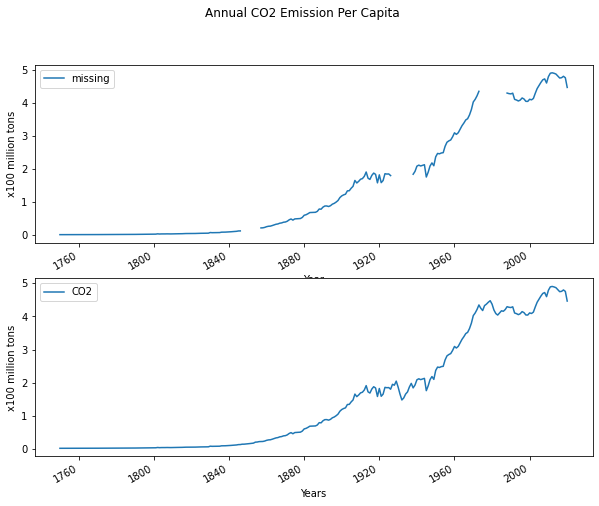

In [195]:
fig, (ax1, ax2) = plt.subplots(2, 1)
fig.suptitle('Annual CO2 Emission Per Capita ')
co2_missing.plot(ax=ax1, figsize=(10,8))
ax1.set_ylabel('x100 million tons')
co2_org.plot(ax=ax2)
ax2.set_xlabel('Years')
ax2.set_ylabel('x100 million tons')
plt.show()

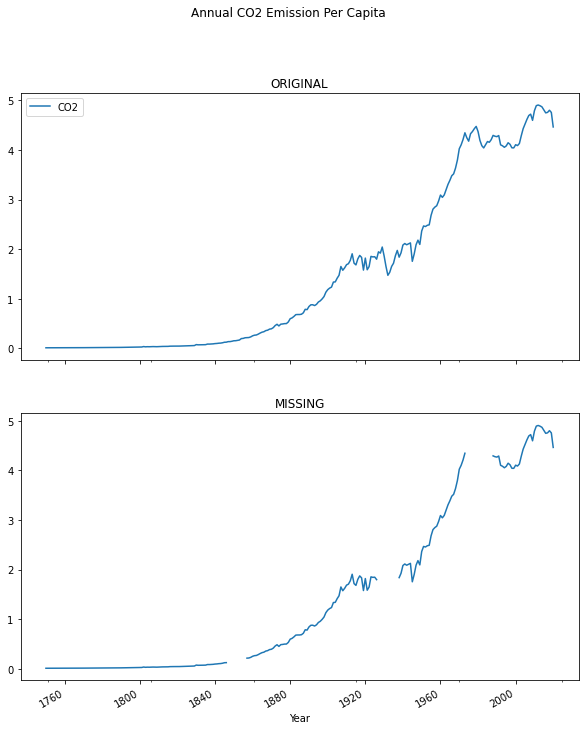

In [196]:
def plot_dfs(df1, df2):
    cols = df2.shape[1]
    fig, ax = plt.subplots(cols+1, 1, sharex=True)
    fig.suptitle('Annual CO2 Emission Per Capita ')
    df1.plot(ax=ax[0], figsize=(10, 12))  
    ax[0].set_title('ORIGINAL')
    for i, col in enumerate(df2.columns):
        df2[col].plot(ax=ax[i+1])
        ax[i+1].set_title(col.upper())
      
    plt.show()
plot_dfs(co2_org, co2_missing)

In [197]:
co2_missing.isnull().sum()

missing    35
dtype: int64

In [198]:
# option 1 
co2_missing['ffil'] = co2_missing['missing'].fillna(method='ffill')
co2_missing['bfill'] = co2_missing['missing'].fillna(method='bfill')
co2_missing['mean'] = co2_missing['missing'].fillna(co2_missing['missing'].mean())


In [199]:
scores = []
for col in co2_missing.columns[1:]:
    rmse = np.sqrt(np.mean((co2_org['CO2'] - co2_missing[col])**2))
    scores.append(rmse)
    print(f'RMSE for {col}: {rmse}')

RMSE for ffil: 0.05873012599267133
RMSE for bfill: 0.05550012995280968
RMSE for mean: 0.7156383637041684


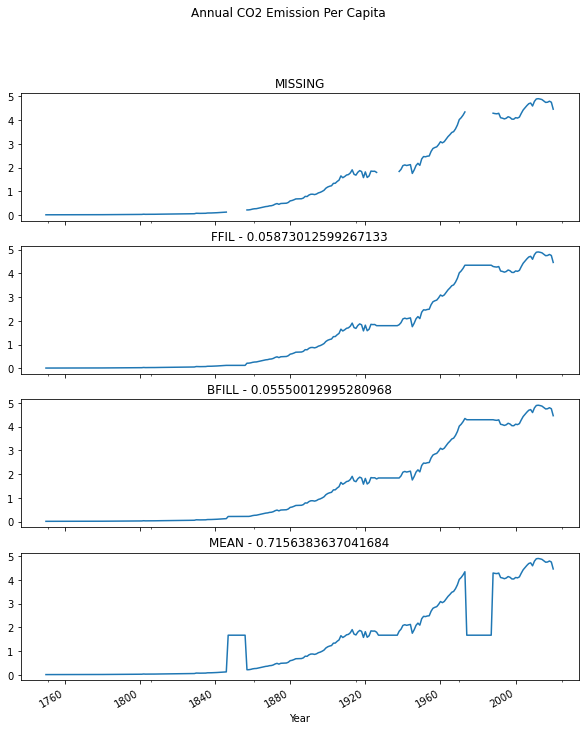

In [200]:
def plot_dfs(df, scores):
    cols = df.shape[1]
    fig, ax = plt.subplots(cols, 1, sharex=True)
    df['missing'].plot(ax=ax[0], figsize=(10, 12))
    ax[0].set_title('MISSING')
    fig.suptitle('Annual CO2 Emission Per Capita ')
    for i, col in enumerate(zip(df.columns[1:], scores)):
        df[col[0]].plot(ax=ax[i+1])
        ax[i+1].set_title(f'{col[0].upper()} - {col[1]}')
    
    plt.show()
plot_dfs(co2_missing, scores)

### Interopelation

In [201]:
file_orig = Path('../../datasets/Ch7/co2_original.csv')
file_missing = Path('../../datasets/Ch7/co2_missing.csv')

co2_org = pd.read_csv(file_orig, index_col='Year', parse_dates=[0])
co2_missing = pd.read_csv(file_missing, index_col='Year', parse_dates=[0])
co2_missing.columns = ['missing']

co2_missing['linear'] = co2_missing['missing'].interpolate(method='linear')
co2_missing['quadratic'] = co2_missing['missing'].interpolate(method='quadratic')
co2_missing['slinear'] = co2_missing['missing'].interpolate(method='slinear')
co2_missing['nearest'] = co2_missing['missing'].interpolate(method='nearest')
co2_missing['polynomial'] = co2_missing['missing'].interpolate(method='polynomial', order=2)

In [202]:
scores = []
for col in co2_missing.columns[1:]:
    rmse = np.sqrt(np.mean((co2_org['CO2'] - co2_missing[col])**2))
    scores.append(rmse)
    print(f'RMSE for {col}: {rmse}')

RMSE for linear: 0.05507291327761665
RMSE for quadratic: 0.08367561505614347
RMSE for slinear: 0.0550726615336139
RMSE for nearest: 0.05385422309469095
RMSE for polynomial: 0.08367561505614347


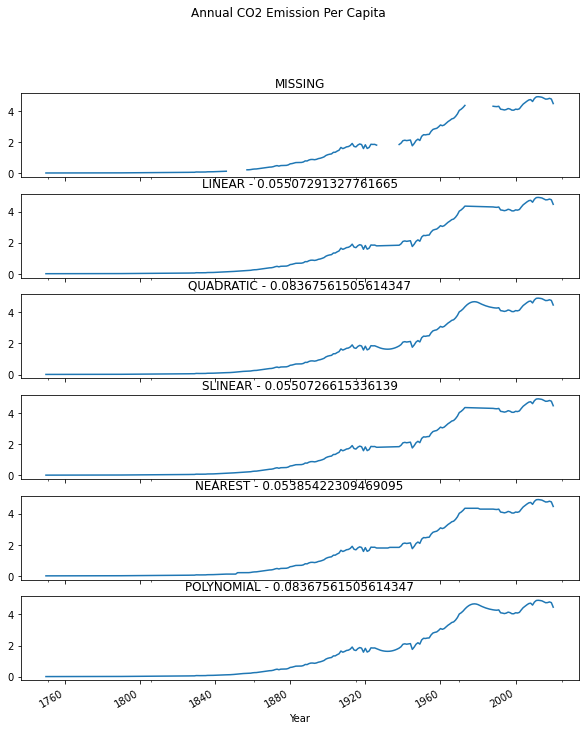

In [203]:
def plot_dfs(df, scores):
    cols = df.shape[1]
    fig, ax = plt.subplots(cols, 1, sharex=True)
    df['missing'].plot(ax=ax[0], figsize=(10, 12))
    ax[0].set_title('MISSING')
    fig.suptitle('Annual CO2 Emission Per Capita ')
    for i, col in enumerate(zip(df.columns[1:], scores)):
        df[col[0]].plot(ax=ax[i+1])
        ax[i+1].set_title(f'{col[0].upper()} - {col[1]}')
    
    plt.show()
plot_dfs(co2_missing, scores)

### Using Scikit-Learn

In [209]:
file_orig = Path('../../datasets/Ch7/co2_original.csv')
file_missing = Path('../../datasets/Ch7/co2_missing.csv')

co2_org = pd.read_csv(file_orig, index_col='Year', parse_dates=[0])
co2_missing = pd.read_csv(file_missing, index_col='Year', parse_dates=[0])
co2_missing.columns = ['missing']

In [216]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import KNNImputer, SimpleImputer, IterativeImputer
from sklearn.ensemble import ExtraTreesRegressor, BaggingRegressor
from sklearn.linear_model import ElasticNet, LinearRegression
from sklearn.neighbors import KNeighborsRegressor

co2_missing['SimpleImputer'] = SimpleImputer(missing_values=np.nan, strategy='mean').fit_transform(co2_missing)
co2_missing['ExtraTreesRegressor'] = IterativeImputer(ExtraTreesRegressor()).fit_transform(co2_missing[['missing']])
co2_missing['BaggingRegressor'] = IterativeImputer(BaggingRegressor()).fit_transform(co2_missing[['missing']])
co2_missing['ElasticNet'] = IterativeImputer(ElasticNet()).fit_transform(co2_missing[['missing']])
co2_missing['LinearRegression'] = IterativeImputer(LinearRegression()).fit_transform(co2_missing[['missing']])
co2_missing['KNeighborsRegressor'] = IterativeImputer(KNeighborsRegressor(n_neighbors=5)).fit_transform(co2_missing[['missing']])
co2_missing['KNNImputer'] = KNNImputer(missing_values=np.nan, n_neighbors=5).fit_transform(co2_missing[['missing']])

In [217]:
scores = []
for col in co2_missing.columns[1:]:
    rmse = np.sqrt(np.mean((co2_org['CO2'] - co2_missing[col])**2))
    scores.append(rmse)
    print(f'RMSE for {col}: {rmse}')

RMSE for SimpleImputer: 0.7156383637041684
RMSE for ExtraTreesRegressor: 0.7156383637041684
RMSE for BaggingRegressor: 0.7156383637041684
RMSE for ElasticNet: 0.7156383637041684
RMSE for LinearRegression: 0.7156383637041684
RMSE for KNeighborsRegressor: 0.7156383637041684
RMSE for KNNImputer: 0.7156383637041684


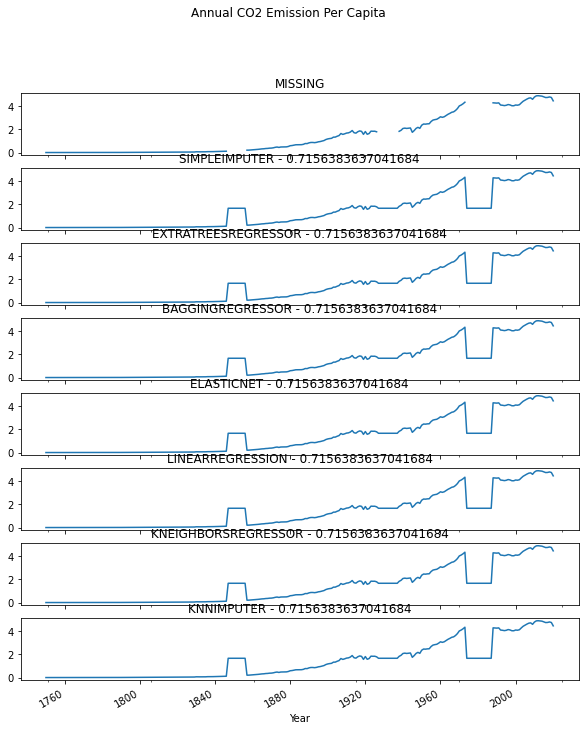

In [218]:
plot_dfs(co2_missing, scores)